# 합성곱 신경망의 시각화

### 1. 앞에서 만든 체크포인트 파일을 읽는다.

In [2]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [6]:
# 첫번째 합성곱 층의 shape 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
# 첫번째 레이어의 가중치 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.030649463 0.2618364


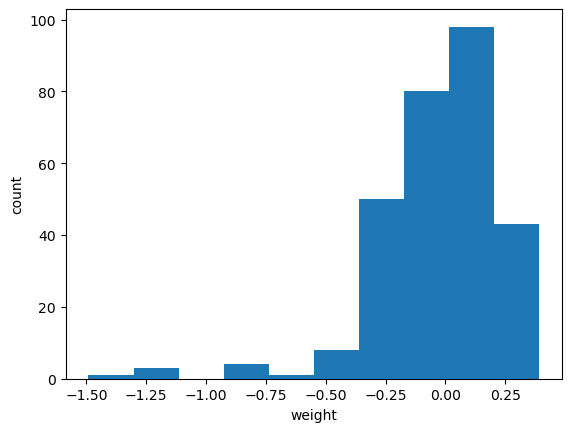

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

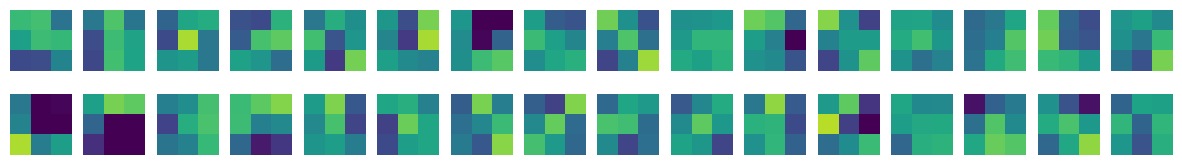

In [9]:
# 각 필터의 가중치 이미지를 출력,
fix, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        # vmin, vmax는 출력할 값의 범위를 한정 
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()